![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64


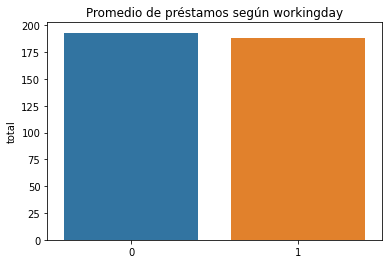

In [67]:
# Celda 1.1

print(bikes.groupby('workingday').total.mean())

sns.barplot(y = bikes.groupby('workingday').total.mean(), x = bikes['workingday'].value_counts().index)
plt.title('Promedio de rentas según workingday')
plt.show()



Se puede observar que el promedio de rentas de bicicletas se mantiene similar entre los días laborables y los que no lo son

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64


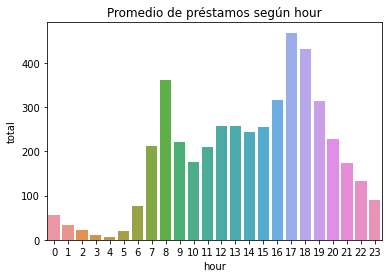

In [74]:
# Celda 1.2
print(bikes.groupby('hour').total.mean())

sns.barplot( y = bikes.groupby('hour').total.mean(),x = bikes.groupby('hour').total.mean().index)
plt.title('Promedio de rentass según hour')
plt.show()

De la misma manera, se puede observar que las horas donde hay, en promedio, más rentas son las 17 y las 18. Esto indica las horas pico del servicio

Text(0.5, 1.0, 'Distribución de pedidos promedio por hora y workingday')

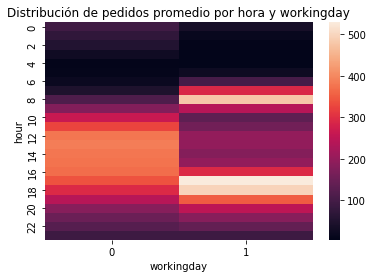

In [77]:
sns.heatmap(pd.pivot_table(data = bikes, index = 'hour', columns = 'workingday', values = 'total', aggfunc= 'mean'))
plt.title('Distribución de pedidos promedio por hora y workingday')

Finalmente, se hizo un análisis para determinar cuáles son las horas con mayor demanda dependiendo si el día es laborable o no. En los días laborables, el promedio de rentas se concentra entre las 8, 17 y 18 horas, lo que se podría explicar por las horas en las que las personas están dirigiendose al trabajo o a su centro de estudios. Sin embargo, durante los días no laborables, la demanda se distribuye entre las 12 y las 16 horas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

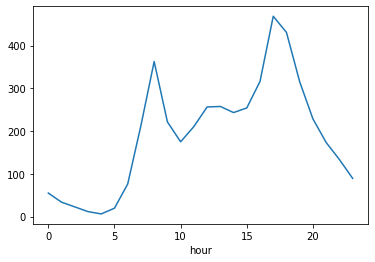

In [78]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

Text(0.5, 1.0, 'Rentas promedio por hora en días no laborables')

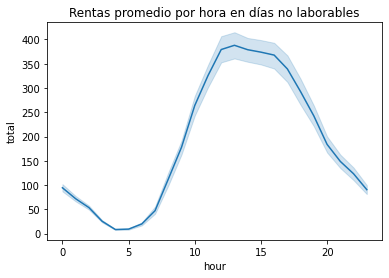

In [83]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
no_laborables = bikes[bikes['workingday']== 0]
sns.lineplot(data = no_laborables, x = 'hour', y = 'total')
plt.title('Rentas promedio por hora en días no laborables')

En este caso, se puede observar que las rentas en días no laborables, en promedio, se encuentran entre las 12 y las 16 horas, mientras que el menor número de rentas se encuentra entre las 4 y las 5 horas.

Text(0.5, 1.0, 'Rentas promedio por hora en días laborables')

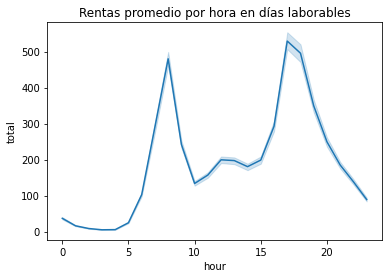

In [85]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
laborables = bikes[bikes['workingday']== 1]
sns.lineplot(data = laborables, x = 'hour', y = 'total')
plt.title('Rentas promedio por hora en días laborables')

Con respecto a las rentas en días laborables, se puede observar que hay dos picos bien marcados. El primero se produce a las 8 horas y el segundo se produce entre las 17 y 18 horas. Esto coincide con las horas de ingreso y salida de los centros de labores y estudios, lo que podría ser un indicio. Al igual que en los días no laborables, la menor cantidad de rentas se produce entre las 3 y 5 horas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [126]:
# Celda 3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


y = bikes['total']
x = bikes[['hour','workingday']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

modelo_rl = LinearRegression().fit(x_train, y_train)
print('Los coeficientes del modelo son:',modelo_rl.coef_)
y_pred_rl = modelo_rl.predict(x_test)
mse_rl = mean_squared_error(y_test,y_pred_rl)
print('El MSE del modelo es', mse_rl)

Los coeficientes del modelo son: [10.11298796  3.3969164 ]
El MSE del modelo es 27592.96528161126


Los coeficientes de la regresión líneal son 10.69 para la variable hour y 4.57 para la variable workingday. Esto indica que, manteniendo todo constante, un aumento en una unidad de la variable hour implica, en promedio, un aumento de 10.69 en la variable total. De la misma manera, manteniendo todo constante, un aumento en una unidad de la variable workingday implica un aumento promedio de 4.57 unidades en la variable total.

Un problema del uso de la regresión lineal, además de tener que adaptarse a un esquema lineal es que, en este caso específico, no sería tan adecuado usarla debido a que la variable workingday es una variable categórica. Es decir, el coeficiente anteriormente hallado y su interpretación no sería correcta bajo el contexto del problema planteado.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [112]:
# Celda 4



{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': -1,
 'n_samples': 10886,
 'gain': 0}

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

El MSE del modelo es 20494.8788405432


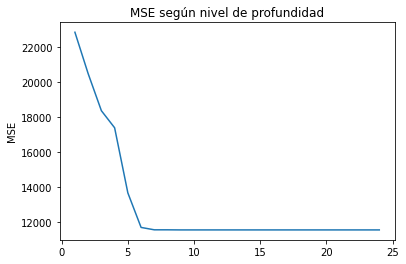

El MSE del modelo calibrado es 11535.678093442019 y se obtiene con un max_depth de 9


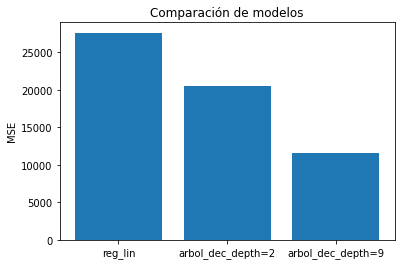

In [162]:
# Celda 5
from sklearn.tree import DecisionTreeRegressor
modelo_regtree = DecisionTreeRegressor(max_depth = 2)
modelo_regtree.fit(x_train,y_train)
y_pred_regtree = modelo_regtree.predict(x_test)
mse_regtree = mean_squared_error(y_test,y_pred_regtree)
print('El MSE del modelo es', mse_regtree)

max_depth_range = range(1,25)
min_samples_leaf_range = range(2,4)
list_mse_regtree = []
for i in max_depth_range:
    modelo = DecisionTreeRegressor(max_depth=i)
    modelo.fit(x_train, y_train)
    y_pred_regtree_i = modelo.predict(x_test)
    insertar = mean_squared_error(y_test,y_pred_regtree_i)
    list_mse_regtree.append(insertar)
plt.plot(max_depth_range,list_mse_regtree)
plt.title('MSE según nivel de profundidad')
plt.ylabel('MSE')
plt.show()

mejor_modelo = list_mse_regtree.index(min(list_mse_regtree))+1

modelo_regtree_max = DecisionTreeRegressor(max_depth = mejor_modelo)
modelo_regtree_max.fit(x_train,y_train)
y_pred_regtree_max = modelo_regtree_max.predict(x_test)
mse_regtree_max = mean_squared_error(y_test,y_pred_regtree_max)
print('El MSE del modelo calibrado es', mse_regtree_max,'y se obtiene con un max_depth de', mejor_modelo)

modelos = ['reg_lin','arbol_dec_depth=2','arbol_dec_depth=9']
mse = [mse_rl,mse_regtree,mse_regtree_max]

plt.bar(x = modelos, height = mse)
plt.title('Comparación de modelos')
plt.ylabel('MSE')
plt.show()

En general, el modelo de árboles de decisión tiene un mejor performance considerando el MSE con respecto a la regresión lineal, sin embargo, se puede observar que el modelo de árboles de decisión puede mejorar significativamente si se hace varias iteraciones con la máxima profundidad que puede tomar el árbol. Al inicio, el MSE del modelo de árboles de decisión con max_depth = 2 es de 20494.87, sin embargo, después de calibrarlo, se consideró un max_depth = 9, lo que redujo el MSE a 11535.67. Después de este número, cualquier aumento en el max_depth no tiene ninguna mejora en el MSE.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [164]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [165]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [166]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

El accuracy del modelo de regresión logística es 0.6133333333333333
El accuracy del modelo de árbol de decisión sin calibración es 0.5426666666666666
F1-Score del modelo regresión logística es 0.6102150537634409
F1-Score del modelo árbol de decisión sin calibración es 0.5377358490566038


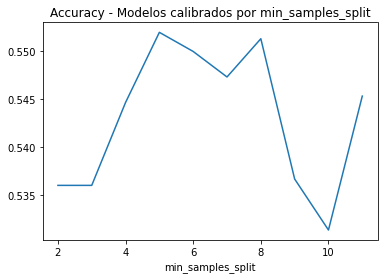

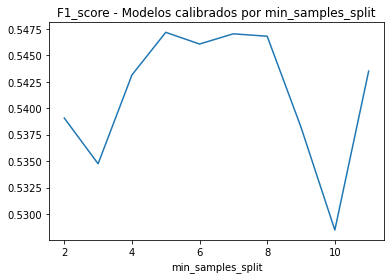

El modelo calibrado muestra mejor accuracy cuando el mínimo de muestras para la división es 5
El accuracy del modelo árbol de decisión calibrado es 0.548
F1-Score del modelo árbol de decisión calibrado es 0.5509933774834437


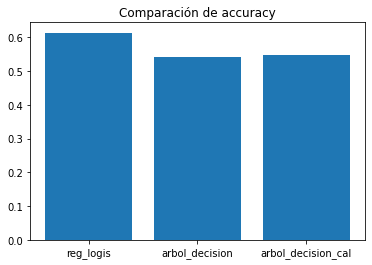

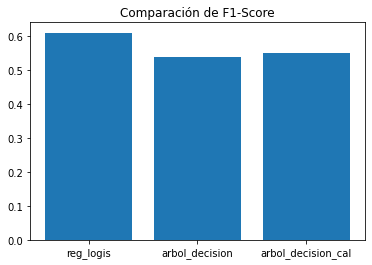

In [193]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Entrenar modelos

modelo_dtclass = DecisionTreeClassifier(min_samples_split = 10)
modelo_logreg = LogisticRegression()
modelo_dtclass.fit(X_train,y_train)
modelo_logreg.fit(X_train,y_train)

### Generar predicciones

y_pred_dtclass = modelo_dtclass.predict(X_test)
y_pred_logreg = modelo_logreg.predict(X_test)

### Generar medidas de desempeño

accuracy_dtclass = accuracy_score(y_test, y_pred_dtclass)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('El accuracy del modelo de regresión logística es', accuracy_logreg)
print('El accuracy del modelo de árbol de decisión sin calibración es', accuracy_dtclass)
f1_dtclass = f1_score(y_test,y_pred_dtclass)
f1_logreg = f1_score(y_test,y_pred_logreg)

print('F1-Score del modelo regresión logística es',f1_logreg)
print('F1-Score del modelo árbol de decisión sin calibración es',f1_dtclass)

### Calibración de árbol de decisión

range_min_samples = range(2,12)
accuracy_cal = []
f1_cal = []
for i in range_min_samples:
    modelo_dtclass_cal = DecisionTreeClassifier(min_samples_split=i)
    modelo_dtclass_cal.fit(X_train, y_train)
    y_pred_dtclass_cal = modelo_dtclass_cal.predict(X_test)
    accuracy_dtclass_cal = accuracy_score(y_test,y_pred_dtclass_cal)
    f1_dtclass_cal = f1_score(y_test,y_pred_dtclass_cal)
    accuracy_cal.append(accuracy_dtclass_cal)
    f1_cal.append(f1_dtclass_cal)

sns.lineplot(x = range_min_samples, y = accuracy_cal)
plt.title('Accuracy - Modelos calibrados por min_samples_split')
plt.xlabel('min_samples_split')
plt.show()

sns.lineplot(x = range_min_samples, y = f1_cal)
plt.title('F1_score - Modelos calibrados por min_samples_split')
plt.xlabel('min_samples_split')
plt.show()


max_accuracy = accuracy_cal.index(max(accuracy_cal))+2
print('El modelo calibrado muestra mejor accuracy cuando el mínimo de muestras para la división es',max_accuracy)
max_f1 = f1_cal.index(max(f1_cal))+2


### Mejor modelo después de calibración

modelo_dtclass_max = DecisionTreeClassifier(min_samples_split = max_accuracy)
modelo_dtclass_max.fit(X_train, y_train)
y_pred_dtclass_max = modelo_dtclass_max.predict(X_test)
accuracy_dtclass_max = accuracy_score(y_test,y_pred_dtclass_max)
f1_dtclass_max = f1_score(y_test,y_pred_dtclass_max)
print('El accuracy del modelo árbol de decisión calibrado es',accuracy_dtclass_max)
print('F1-Score del modelo árbol de decisión calibrado es',f1_dtclass_max)


### Comparar modelos

modelos_usados =['reg_logis','arbol_decision','arbol_decision_cal']
accuracy_evaluacion = [accuracy_logreg,accuracy_dtclass, accuracy_dtclass_max]
f1_evaluacion = [f1_logreg,f1_dtclass,f1_dtclass_max]

### Gráficos

plt.bar(x = modelos_usados, height = accuracy_evaluacion)
plt.title('Comparación de accuracy')
plt.show()

plt.bar(x = modelos_usados, height = f1_evaluacion)
plt.title('Comparación de F1-Score')
plt.show()



### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

El accuracy del modelo dectree=None es de: 0.64
F1-Score del modelo dectree=None es de: 0.642384105960265
El accuracy del modelo dectree=2 es de: 0.6446666666666667
F1-Score del modelo dectree=2 es de: 0.6439545758183033
El accuracy del modelo reglog es de: 0.6173333333333333
F1-Score del modelo reglog es de: 0.6116373477672531


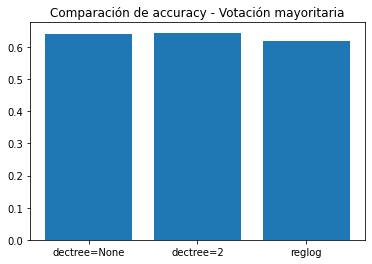

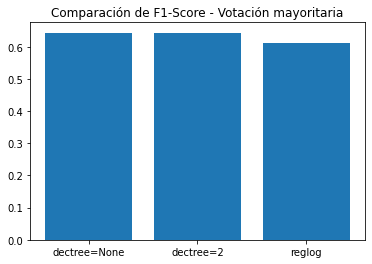

In [238]:
# Celda 7

from sklearn.ensemble import BaggingClassifier
dectree = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
dectree_dos = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
reglog = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

dectree.fit(X_train, y_train)
dectree_dos.fit(X_train, y_train)
reglog.fit(X_train, y_train)

y_pred_dectree = dectree.predict(X_test)
y_pred_dectree_dos = dectree_dos.predict(X_test)
y_pred_reglog = reglog.predict(X_test)

accuracy_dectree = accuracy_score(y_pred_dectree,y_test)
accuracy_dectree_dos = accuracy_score(y_pred_dectree_dos,y_test)
accuracy_reglog = accuracy_score(y_pred_reglog,y_test)

f1_dectree = f1_score(y_pred_dectree,y_test)
f1_dectree_dos = f1_score(y_pred_dectree_dos, y_test)
f1_reglog = f1_score(y_pred_reglog, y_test)

modelos_mayoritaria = ['dectree=None','dectree=2','reglog']
accuracy_mayo = [accuracy_dectree, accuracy_dectree_dos, accuracy_reglog]
f1_mayo = [f1_dectree, f1_dectree_dos, f1_reglog]


for i in range(0,len(accuracy_mayo)):
    mensaje = 'El accuracy del modelo '+modelos_mayoritaria[i] + ' es de: ' + str(accuracy_mayo[i])
    mensaje_dos = 'F1-Score del modelo '+modelos_mayoritaria[i] + ' es de: ' + str(f1_mayo[i])
    print(mensaje)
    print(mensaje_dos)


plt.bar(x = modelos_mayoritaria, height = accuracy_mayo)
plt.title('Comparación de accuracy - Votación mayoritaria')
plt.show()


plt.bar(x = modelos_mayoritaria, height = f1_mayo)
plt.title('Comparación de F1-Score - Votación mayoritaria')
plt.show()

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

El accuracy del modelo dectree=None es de: 0.6453333333333333
F1-Score del modelo dectree=None es de: 0.6513761467889909
El accuracy del modelo dectree=2 es de: 0.6453333333333333
F1-Score del modelo dectree=2 es de: 0.6448598130841121
El accuracy del modelo reglog es de: 0.6173333333333333
F1-Score del modelo reglog es de: 0.6121621621621622


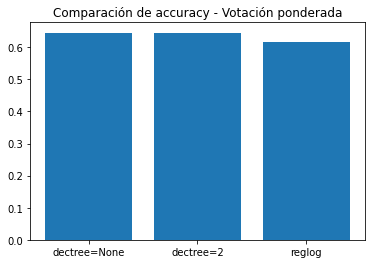

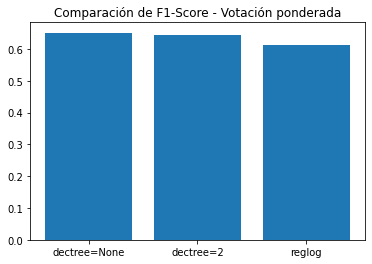

In [239]:
# Celda 8
def votacion_ponderada(dectree):

    errors = np.zeros(dectree.n_estimators)
    y_pred_all_ = np.zeros((X_test.shape[0], dectree.n_estimators))

    for i in range(dectree.n_estimators):
        oob_sample = ~dectree.estimators_samples_[i]
        y_pred_ = dectree.estimators_[i].predict(X_train.values[oob_sample])
        errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = dectree.estimators_[i].predict(X_test)
    
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
    return y_pred


y_pred_dectree_pon = votacion_ponderada(dectree)
y_pred_dectree_dos_pon = votacion_ponderada(dectree_dos)
y_pred_reglog_pon = votacion_ponderada(reglog)

accuracy_pon = []
f1_pon = []
modelos_pon = ['dectree=None','dectree=2','reglog']
predicciones = [y_pred_dectree_pon, y_pred_dectree_dos_pon,y_pred_reglog_pon]
for i in predicciones:
    accuracy = accuracy_score(i,y_test)
    f1score = f1_score(i,y_test)
    accuracy_pon.append(accuracy)
    f1_pon.append(f1score)


for i in range(0,len(accuracy_pon)):
    mensaje = 'El accuracy del modelo '+modelos_pon[i] + ' es de: ' + str(accuracy_pon[i])
    mensaje_dos = 'F1-Score del modelo '+modelos_pon[i] + ' es de: ' + str(f1_pon[i])
    print(mensaje)
    print(mensaje_dos)

plt.bar(x = modelos_pon, height = accuracy_pon)
plt.title('Comparación de accuracy - Votación ponderada')
plt.show()


plt.bar(x = modelos_pon, height = f1_pon)
plt.title('Comparación de F1-Score - Votación ponderada')
plt.show()

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

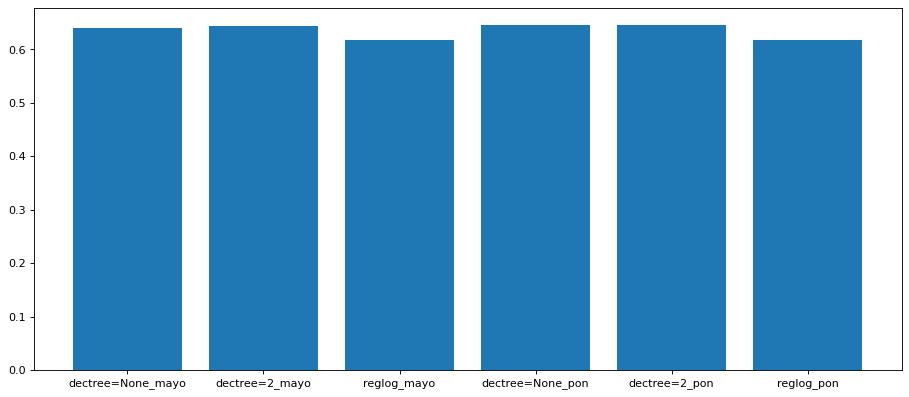

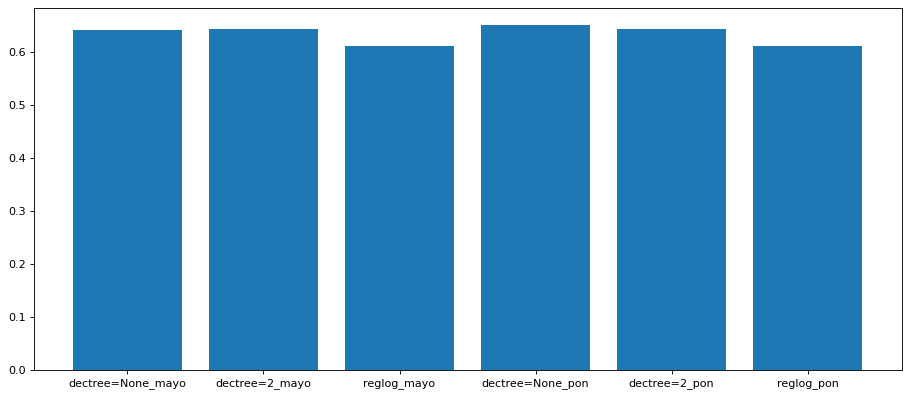

('El accuracy del modelo dectree=None_mayo', ' es de: 0.64')
('F1-Score del modelodectree=None_mayo', ' es de: 0.642384105960265')
('El accuracy del modelo dectree=2_mayo', ' es de: 0.6446666666666667')
('F1-Score del modelodectree=2_mayo', ' es de: 0.6439545758183033')
('El accuracy del modelo reglog_mayo', ' es de: 0.6173333333333333')
('F1-Score del modeloreglog_mayo', ' es de: 0.6116373477672531')
('El accuracy del modelo dectree=None_pon', ' es de: 0.6453333333333333')
('F1-Score del modelodectree=None_pon', ' es de: 0.6513761467889909')
('El accuracy del modelo dectree=2_pon', ' es de: 0.6453333333333333')
('F1-Score del modelodectree=2_pon', ' es de: 0.6448598130841121')
('El accuracy del modelo reglog_pon', ' es de: 0.6173333333333333')
('F1-Score del modeloreglog_pon', ' es de: 0.6121621621621622')


In [240]:
# Celda 9
from matplotlib.pyplot import figure
modelos_final = ['dectree=None_mayo','dectree=2_mayo','reglog_mayo','dectree=None_pon','dectree=2_pon','reglog_pon']
accuracy_final = accuracy_mayo.copy()
accuracy_final.extend(accuracy_pon)
f1_final = f1_mayo.copy()
f1_final.extend(f1_pon)

figure(figsize=(14, 6), dpi=80)

plt.bar(x = modelos_final, height = accuracy_final)
plt.show()

figure(figsize=(14, 6), dpi=80)

plt.bar(x = modelos_final, height = f1_final)
plt.show()

for i in range(0,6):
    mensaje = 'El accuracy del modelo '+ modelos_final[i],' es de: ' + str(accuracy_final[i])
    mensaje_dos = 'F1-Score del modelo'+ modelos_final[i],' es de: ' + str(f1_final[i])
    print(mensaje)
    print(mensaje_dos)

Como comentario final, se puede decir que, a nivel de accuracy, los árboles de decisión tienen un mejor performance al momento de aplicar estas técnicas de ensamblaje. Ambas técnicas presentan valores similares al momento de medir el accuracy y el F1-Score, sin embargo, sí presentan una mejoría con respecto a no usar ninguna técnica. En ese sentido, se recomienda el uso de estas técnicas para poder mejorar el performance de estos algoritmos.